<a href="https://colab.research.google.com/github/htapiagroup/sistdist/blob/master/SistDist2_S4_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import  numpy as np
a = np.random.rand(10000)

In [2]:
a.shape

(10000,)

In [3]:
a.dtype

dtype('float64')

In [4]:
a.nbytes

80000

In [7]:
%time a.sum()

CPU times: user 733 µs, sys: 0 ns, total: 733 µs
Wall time: 659 µs


4971.025249365767

In [0]:
import dask.array as da

In [0]:
a_dask = da.from_array(a, chunks=len(a)//3)

In [10]:
type(a_dask)

dask.array.core.Array

In [11]:
a_dask.chunks

((3333, 3333, 3333, 1),)

In [0]:
n_chunks = 8
chunk_size = len(a) // n_chunks

res = 0

In [14]:
%%time

for k in range(n_chunks):
  offset = k*chunk_size
  a_chunk = a[offset:offset + chunk_size]
  res += a_chunk.sum()

CPU times: user 513 µs, sys: 0 ns, total: 513 µs
Wall time: 425 µs


In [15]:
%time res_dask = a_dask.sum()

CPU times: user 2.24 ms, sys: 0 ns, total: 2.24 ms
Wall time: 2.22 ms


In [18]:
%time res_dask.compute()

CPU times: user 4.48 ms, sys: 892 µs, total: 5.37 ms
Wall time: 4.83 ms


4971.025249365767

In [0]:
res_dask.visualize(rankdir='LR')

## Ejercicio
redefinir el arreglo  `a_dask` usando trozos equivalentes a los usados en el `for` y comparar tiempos de ejecucion. Discutir lo obtenido



# Medir tiempos  de operacion sobre arreglos con dask

In [0]:
!wget https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5

In [0]:
!cp H-H1_LOSC_4_V1-815411200-4096.hdf5 LIGO_data.hdf5

In [0]:
import h5py, time

In [24]:
datos = h5py.File('./LIGO_data.hdf5')
type(datos)

h5py._hl.files.File

In [25]:
for key in datos.keys():
  print(key)

meta
quality
strain


In [0]:
with datos as dset:
  strain = dset['strain']['Strain'][:]

In [27]:
strain

array([-2.37884722e-16, -2.55453801e-16, -2.72831053e-16, ...,
                   nan,             nan,             nan])

In [32]:
type(strain)

numpy.ndarray

In [33]:
strain.shape

(16777216,)

In [35]:
strain.sum()

nan

In [0]:
strain_dask8 = da.from_array(strain, chunks=strain.shape[0]//16

In [40]:
ti = time.time()
promedio8 = strain_dask8.mean().compute()
tf = time.time()
print('Tiempo transcurrido: {} ms'.format((tf-ti)*1000))

Tiempo transcurrido: 68.93491744995117 ms


In [41]:
print(promedio8)

nan


In [0]:
strain_dask8.visualize()

# Arreglos multidimensionales

In [0]:
ts=np.array([49,51,60,54,47,50,64,58,47,43,50,63,67,68,64,48,55,46,66,51,52])
np.savetxt('temp_max.csv', ts.astype(int), fmt='%i')

In [45]:
ls

H-H1_LOSC_4_V1-815411200-4096.hdf5  mydask.png    temp_max.csv
LIGO_data.hdf5                      sample_data/


In [0]:
!cat temp_max.csv

In [47]:
ts = np.loadtxt('temp_max.csv', dtype=np.int64)
type(ts)

numpy.ndarray

In [48]:
ts.shape

(21,)

In [49]:
ts.ndim

1

In [50]:
print(ts)

[49 51 60 54 47 50 64 58 47 43 50 63 67 68 64 48 55 46 66 51 52]


In [52]:
ts.std()

7.63391406756257

Tomense un break

In [0]:
break0 = time.time()

In [55]:

break1 = time.time()
print((break1-break0))

858.6267566680908


In [56]:
858.6/60

14.31

In [65]:
mier = []
for i,v in enumerate(ts):
  if i%7==3:
    mier.append(v)
print(mier)
np.mean(mier)

[54, 50, 46]


50.0

In [0]:
semanas = ts.reshape([3,7])

In [72]:
type(semanas)

numpy.ndarray

In [76]:
semanas.ndim

2

In [79]:
semanas.size

21

In [80]:
semanas

array([[49, 51, 60, 54, 47, 50, 64],
       [58, 47, 43, 50, 63, 67, 68],
       [64, 48, 55, 46, 66, 51, 52]])

In [86]:
ts

array([49, 51, 60, 54, 47, 50, 64, 58, 47, 43, 50, 63, 67, 68, 64, 48, 55,
       46, 66, 51, 52])

In [89]:
ts.reshape([7,3], order='F')

array([[49, 58, 64],
       [51, 47, 48],
       [60, 43, 55],
       [54, 50, 46],
       [47, 63, 66],
       [50, 67, 51],
       [64, 68, 52]])

In [0]:
dias=semanas.transpose()

In [94]:
dias[4,:]

array([47, 63, 66])

In [95]:
dias

array([[49, 58, 64],
       [51, 47, 48],
       [60, 43, 55],
       [54, 50, 46],
       [47, 63, 66],
       [50, 67, 51],
       [64, 68, 52]])

In [107]:
dias.mean(axis=1)

array([57.        , 48.66666667, 52.66666667, 50.        , 58.66666667,
       56.        , 61.33333333])

In [0]:
semanas - dias.mean(axis=1)

In [0]:
tabla = dias - dias.mean(axis=0)

In [113]:
tabla

array([[ -4.57142857,   1.42857143,   9.42857143],
       [ -2.57142857,  -9.57142857,  -6.57142857],
       [  6.42857143, -13.57142857,   0.42857143],
       [  0.42857143,  -6.57142857,  -8.57142857],
       [ -6.57142857,   6.42857143,  11.42857143],
       [ -3.57142857,  10.42857143,  -3.57142857],
       [ 10.42857143,  11.42857143,  -2.57142857]])

In [115]:
tabla.reshape([3,7])

array([[ -4.57142857,   1.42857143,   9.42857143,  -2.57142857,
         -9.57142857,  -6.57142857,   6.42857143],
       [-13.57142857,   0.42857143,   0.42857143,  -6.57142857,
         -8.57142857,  -6.57142857,   6.42857143],
       [ 11.42857143,  -3.57142857,  10.42857143,  -3.57142857,
         10.42857143,  11.42857143,  -2.57142857]])

# Como se usa esto con dask

In [0]:
data = np.genfromtxt('https://www1.ncdc.noaa.gov/pub/data/ccd-data/hghtmp15.dat', usecols=(2,3,4,5), skip_header=5, dtype=np.int64)

In [118]:
data.shape

(259, 4)

In [119]:
type(data)

numpy.ndarray

In [0]:
data_dask = da.from_array(data, chunks=(259,2))

In [0]:
res = data_dask.mean(axis=0)

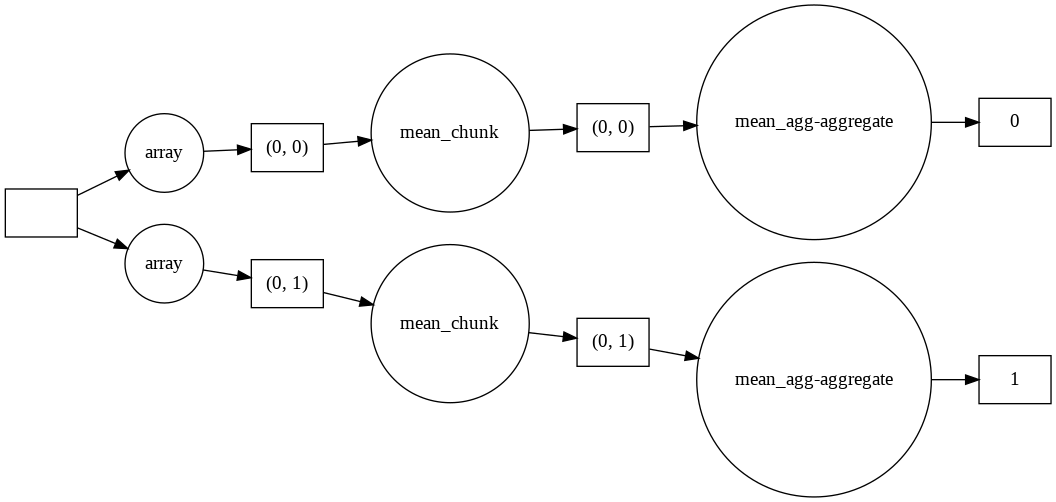

In [124]:
res.visualize(rankdir='LR')

In [125]:
res.compute()

array([51.83011583, 71.91891892, 80.93050193, 89.22007722])

El anterior es lo mismo que 

In [121]:
data.mean(axis=0)

array([51.83011583, 71.91891892, 80.93050193, 89.22007722])